In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
df = pd.read_csv('Student_Performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
df_mod = pd.get_dummies(data= df, drop_first=True)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


In [10]:
X = df_mod.drop(columns=['Performance Index'])
y = df_mod['Performance Index']

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

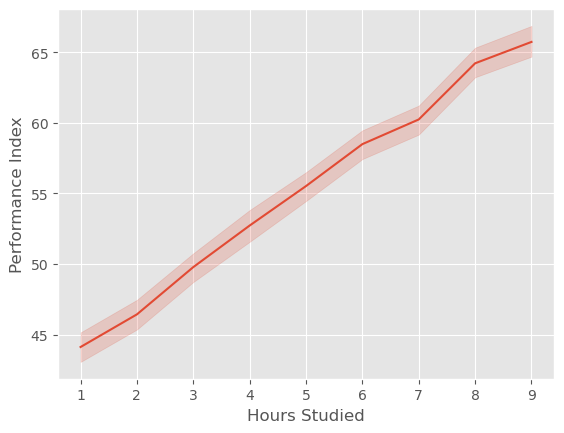

In [31]:
sns.lineplot(x='Hours Studied', y='Performance Index', data=df)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12313,test_size=0.25)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7500, 5), (2500, 5), (7500,), (2500,))

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
r2_score(y_pred=y_pred,y_true=y_test)

0.9893364663038963

In [18]:
mean_squared_error(y_pred=y_pred,y_true=y_test)

np.float64(3.9470506515007298)